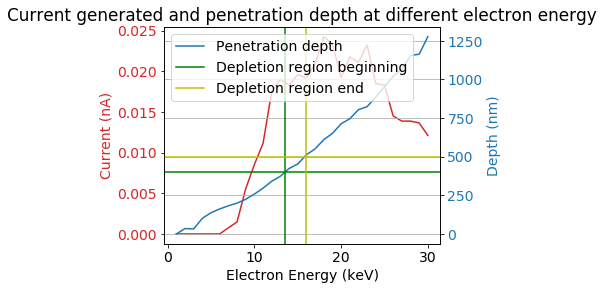

In [9]:
import csv
import matplotlib.pyplot as plt
from statistics import mean
import matplotlib

# list of all the result files
# first number is the energy of the electron
# there are two files as I had two threads
simulation_result_files = [
    [
        '1kt0.csv',
        '1kt1.csv'
    ],
    [
        '2kt0.csv',
        '2kt1.csv'
    ],
    [
        '3kt0.csv',
        '3kt1.csv'
    ],
    [
        '4kt0.csv',
        '4kt1.csv'
    ],
    [
        '5kt0.csv',
        '5kt1.csv'
    ],
    [
        '6kt0.csv',
        '6kt1.csv'
    ],
    [
        '7kt0.csv',
        '7kt1.csv'
    ],
    [
        '8kt0.csv',
        '8kt1.csv'
    ],
    [
        '9kt0.csv',
        '9kt1.csv'
    ],
    [
        '10kt0.csv',
        '10kt1.csv'
    ],
    [
        '11kt0.csv',
        '11kt1.csv'
    ],
    [
        '12kt0.csv',
        '12kt1.csv'
    ],
    [
        '13kt0.csv',
        '13kt1.csv'
    ],
    [
        '14kt0.csv',
        '14kt1.csv'
    ],
    [
        '15kt0.csv',
        '15kt1.csv'
    ],
    [
        '16kt0.csv',
        '16kt1.csv'
    ],
    [
        '17kt0.csv',
        '17kt1.csv'
    ],
    [
        '18kt0.csv',
        '18kt1.csv'
    ],
    [
        '19kt0.csv',
        '19kt1.csv'
    ],
    [
        '20kt0.csv',
        '20kt1.csv'
    ],
    [
        '21kt0.csv',
        '21kt1.csv'
    ],
    [
        '22kt0.csv',
        '22kt1.csv'
    ],
    [
        '23kt0.csv',
        '23kt1.csv'
    ],
    [
        '24kt0.csv',
        '24kt1.csv'
    ],
    [
        '25kt0.csv',
        '25kt1.csv'
    ],
    [
        '26kt0.csv',
        '26kt1.csv'
    ],
    [
        '27kt0.csv',
        '27kt1.csv'
    ],
    [
        '28kt0.csv',
        '28kt1.csv'
    ],
    [
        '29kt0.csv',
        '29kt1.csv'
    ],
    [
        '30kt0.csv',
        '30kt1.csv'
    ]
]

FLAG_PARTICLE = {
    'e-': '1',
    'proton': '2',
    'GenericIon': '3'}

FLAG_PROCESS = {
    'msc': '10',
    'e-_G4MicroElecElastic': '11',
    'e-_G4MicroElecInelastic': '12',
    'eCapture': '13',
    'p_G4MicroElecInelastic': '14',
    'ion_G4MicroElecInelastic': '15',
    'hIoni': '16',
    'eIoni': '17'}

PARTICLE_COL = 0
PROCESS_COL = 1
X_COL = 2
Y_COL = 3
Z_COL = 4
TOTAL_ENERGY_COL = 5
STEP_LENGTH_COL = 6
KINETIC_ENERGY_COL = 7

particle_count = {
    'electron': 0,
    'proton': 0,
    'ion': 0
}

process_count = {
    'msc': 0,
    'e_elastic': 0,
    'e_inelastic': 0,
    'e_capture': 0,
    'p_inelastic': 0,
    'ion_inelastic': 0,
    'h_ionisation': 0,
    'e_ionisation': 0,
}

# the surface of the detector starts at -2000 nm
# the depletion region is between 400 - 500 nm within the detector
DETECTOR_OFFSET = 2000
DEPLETION_BEGINNING = 400
DEPLETION_END = 500

position_of_secondaries = []
energies_over_range = []

count = 0
for result_file in simulation_result_files:
    # get the average position
    position_of_secondaries.append([])
    energies_over_range.append([])
    for rfile in result_file:
        with open(rfile) as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                if len(row) > 1:
                    # choose only particles that are electrons and ionisation events
                    if (row[PARTICLE_COL] == FLAG_PARTICLE['e-'] 
                            and row[PROCESS_COL] == FLAG_PROCESS['eIoni']):
                        position_of_secondaries[count].append(float(row[Z_COL]))
                        # record events that occur within the depletion region
                        if (float(row[Z_COL]) + DETECTOR_OFFSET < DEPLETION_END 
                                and float(row[Z_COL]) + DETECTOR_OFFSET > DEPLETION_BEGINNING):
                            eng = float(row[KINETIC_ENERGY_COL])
                            energies_over_range[count].append(eng)
    count += 1

# calculate the current generated
currents = []
ehp_energy = 4.2
electron_energy = 1.6 * 10 ** -19
electron_flux = 10000
convert_to_nanoamps = 1000000000
collection_probability = 0.1

for energies in energies_over_range:
    ehp = sum(energies)/ehp_energy
    current = collection_probability * electron_flux * electron_energy * ehp * convert_to_nanoamps
    currents.append(current)

# calculate the average position of each electron interaction
energy_range = range(1, 31)
mean_pos = []
for pos in position_of_secondaries:
    if len(pos) > 0:
        mean_pos.append(mean(pos) + DETECTOR_OFFSET)
    else:
        mean_pos.append(0)

# set font to be larger
font_size = {'size': '14'}
matplotlib.rc('font', **font_size)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Electron Energy (keV)')
ax1.set_ylabel('Current (nA)', color=color)
ax1.plot(energy_range, currents, color=color, label='Current')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Depth (nm)', color=color)  # we already handled the x-label with ax1
ax2.plot(energy_range, mean_pos, color=color, label='Penetration depth')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.axvline(x=13.5, ymin=0, ymax=1, color='g')
plt.axhline(y=400, xmin=0, xmax=1, color='g', label='Depletion region beginning')
plt.axvline(x=16, ymin = 0, ymax=1, color='y')
plt.axhline(y=500, xmin=0, xmax=1, color='y', label='Depletion region end')

plt.title('Current generated and penetration depth at different electron energy')
plt.legend()
plt.grid(True)
plt.show()